# Heart Disease Dataset
## 1. Introduction

Cardiovascular disease is one of the leading causes of death globally, making early detection an important challenge in healthcare.
This project uses the UCI Heart Disease dataset, a widely studied dataset in clinical machine learning research, to predict whether a patient is likely to have heart disease based on a set of medical attributes.

Objectives:

    - Perform clear exploratory data analysis (EDA) to understand patterns and relationships in the dataset.
	- Engineer useful features that may improve model performance and interpretability.
	- Develop predictive models capable of identifying heart disease risk.
	- Explain model predictions using feature importance and SHAP values. 




In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-diseaseuci/heart.csv


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.metrics import precision_recall_curve, average_precision_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [58]:
heart = pd.read_csv('/kaggle/input/heart-diseaseuci/heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [59]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [60]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [61]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [62]:
print('Shape of heart dataset: ',heart.shape)
print('Duplicate count', heart.duplicated().sum())
print('Null value count by column: \n', heart.isna().sum())
print('Total count of Null values: ', heart.isna().sum().sum())

Shape of heart dataset:  (303, 14)
Duplicate count 1
Null value count by column: 
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Total count of Null values:  0


In [63]:
#Dropping 1 duplicate row
heart.drop_duplicates(inplace=True)
print(heart.shape)

(302, 14)


In [64]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## 2. Exploratory Data Analysis

In [65]:
#Target Distribution
counts = heart['target'].value_counts()
percent = heart['target'].value_counts(normalize=True) * 100

pd.DataFrame({'count': counts, 'percent': percent})

,count,percent
target,,
1,164,54.304636
0,138,45.695364


Slightly imbalanced dataset.\
Patients with heart disease (target = 1) = 164, (54.30%)\
Patients without heart disease (target = 0) = 138, (45.70%)

In [66]:
# Numeric vs non-numeric columns
numeric_cols = heart.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = heart.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", cat_cols)

Numeric columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Categorical columns: []


Skipping column: sex
Skipping column: cp
Skipping column: fbs
Skipping column: restecg
Skipping column: exang
Skipping column: slope
Skipping column: ca
Skipping column: thal
Skipping column: target


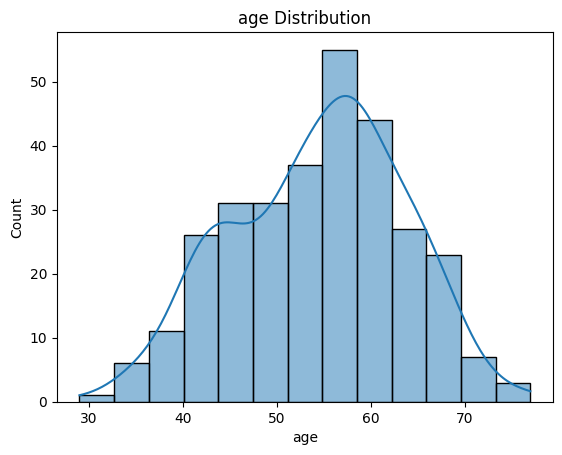

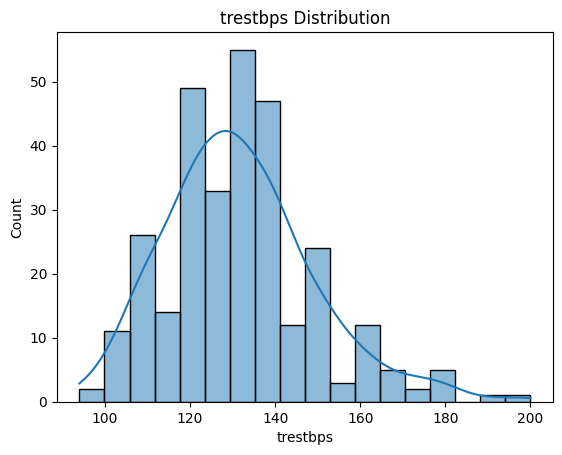

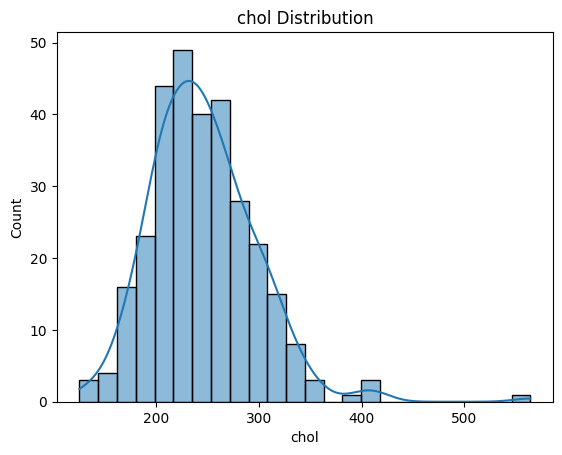

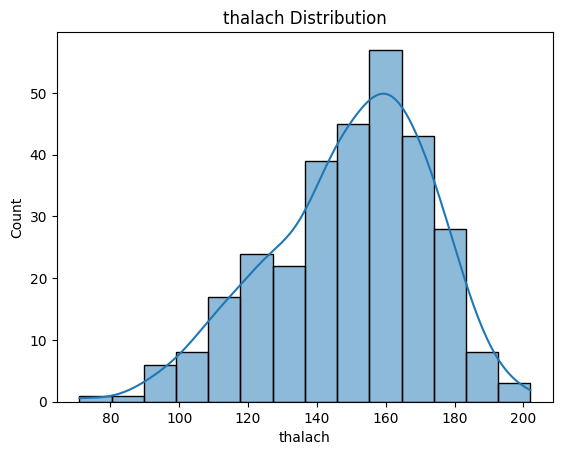

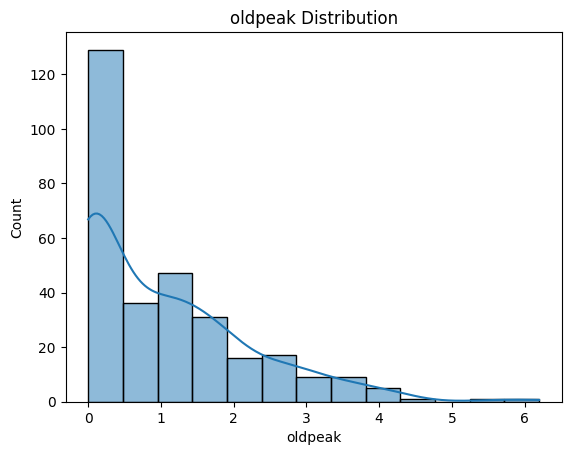

In [67]:
for col in heart.select_dtypes(include=['float', 'int']):
    if heart[col].nunique() <= 5:
        print(f"Skipping column: {col}")
        continue
    plt.figure()
    sns.histplot(heart[col], kde=True)
    plt.title(f'{col} Distribution')

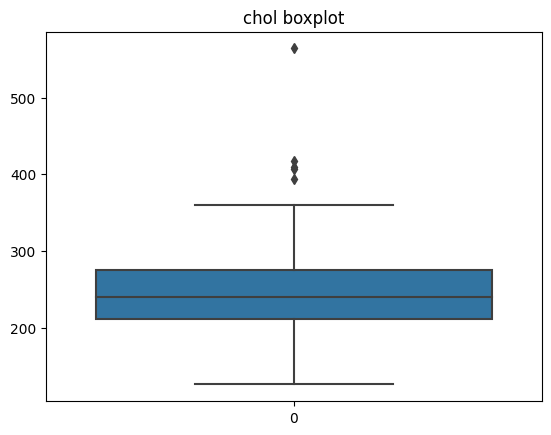

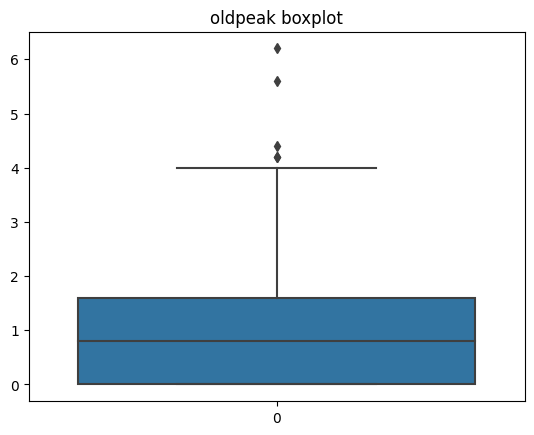

In [68]:
#looking at 'outliers'
feat = ['chol','oldpeak']

for f in feat:
    plt.figure()
    sns.boxplot(heart[f])
    plt.title(f'{f} boxplot')

Outliers here and medically true

A cholesterol level of 400 mg/dL is high, but clinically real (familial hypercholesterolemia)

Oldpeak outliers represent severe ischemia

In [69]:
heart['oldpeak'].value_counts().sort_index()

oldpeak
0.0    98
0.1     7
0.2    12
0.3     3
0.4     9
0.5     5
0.6    14
0.7     1
0.8    13
0.9     3
1.0    14
1.1     2
1.2    17
1.3     1
1.4    13
1.5     5
1.6    11
1.8    10
1.9     5
2.0     9
2.1     1
2.2     4
2.3     2
2.4     3
2.5     2
2.6     6
2.8     6
2.9     1
3.0     5
3.1     1
3.2     2
3.4     3
3.5     1
3.6     4
3.8     1
4.0     3
4.2     2
4.4     1
5.6     1
6.2     1
Name: count, dtype: int64

Skipping column: sex
Skipping column: cp
Skipping column: fbs
Skipping column: restecg
Skipping column: exang
Skipping column: slope
Skipping column: ca
Skipping column: thal
Skipping column: target


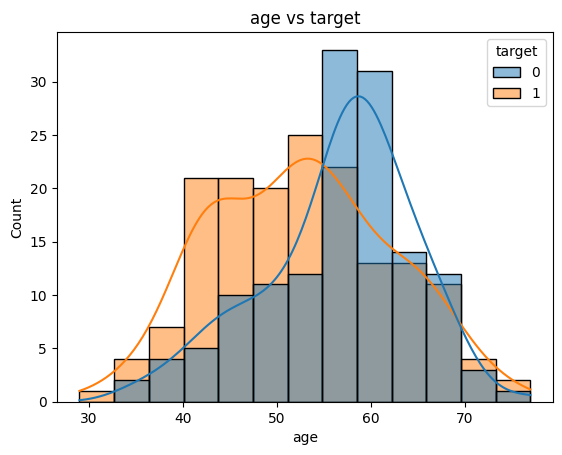

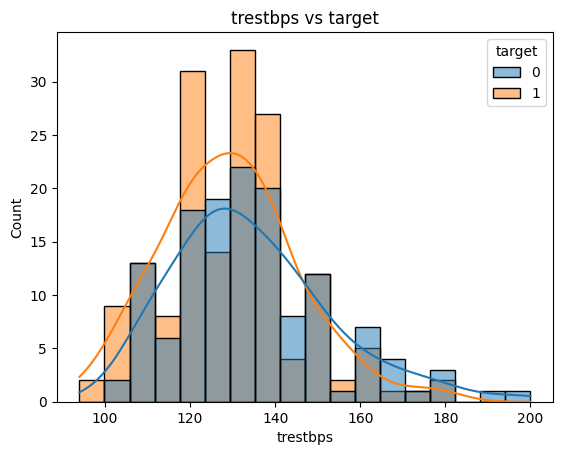

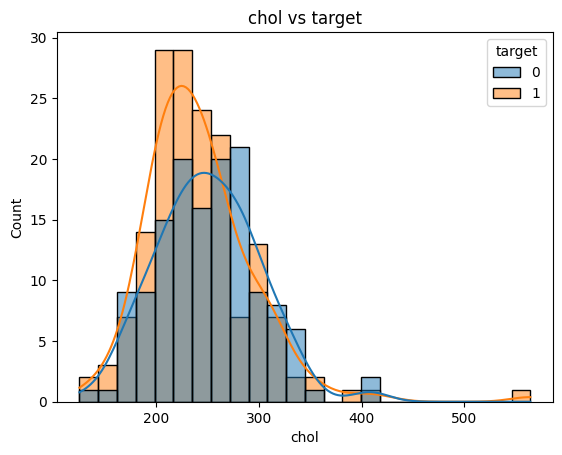

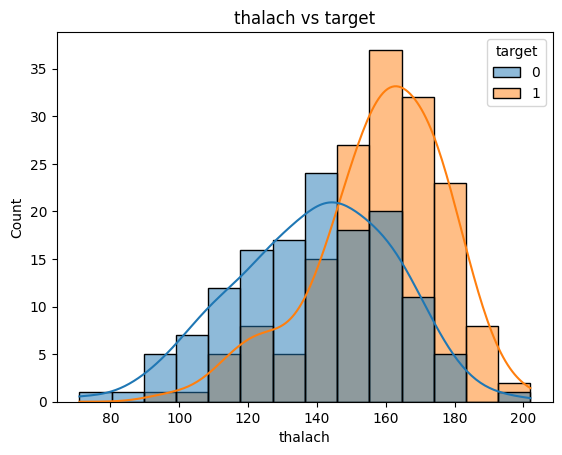

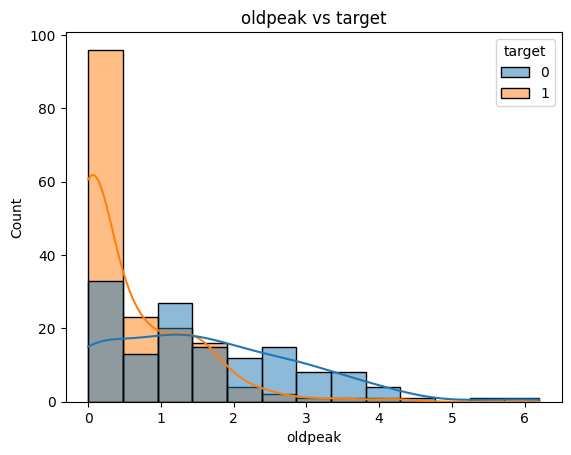

In [70]:
target = 'target'  # update to your target

for col in heart.select_dtypes(include=['float','int']):
    if heart[col].nunique() <= 5:
        print(f"Skipping column: {col}")
        continue
    plt.figure()
    sns.histplot(data=heart, x=col, hue=target, kde=True)
    plt.title(f'{col} vs {target}')

In [71]:
binary_features = ['sex', 'fbs', 'exang']
categorical_features = ['cp', 'restecg', 'slope', 'thal', 'ca']

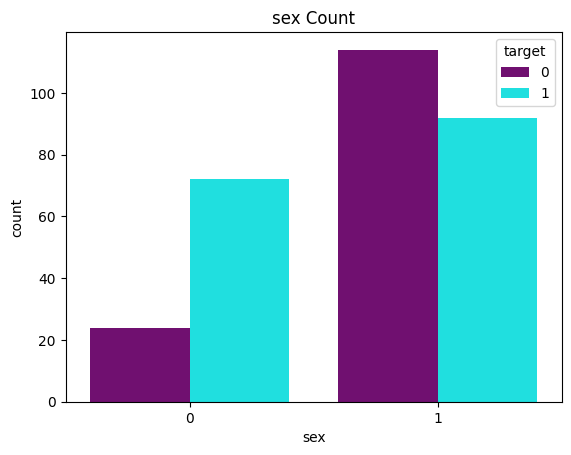

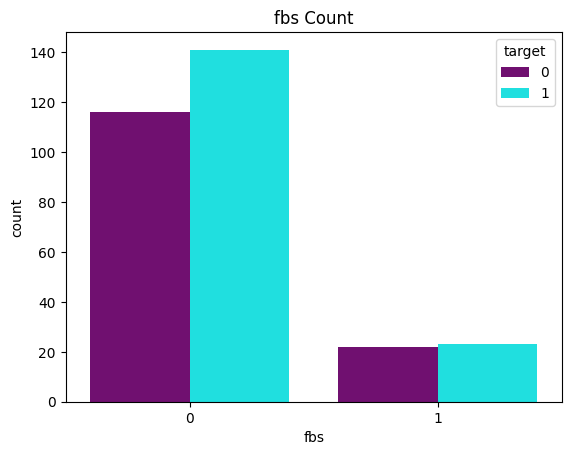

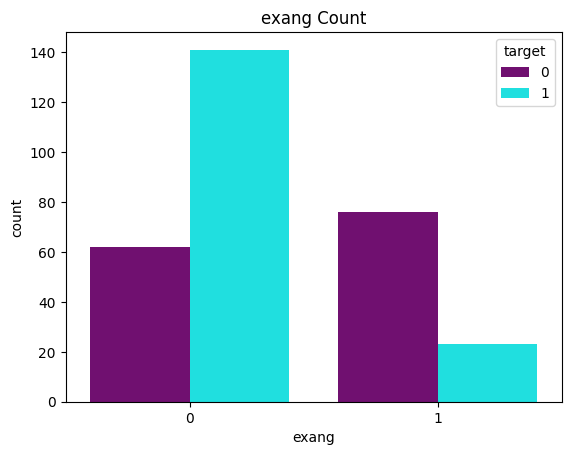

In [72]:
for col in binary_features:
    plt.figure()
    sns.countplot(x=col, hue='target', data=heart, palette=['purple','cyan'])
    plt.title(f'{col} Count')
    plt.show()

sex = male (1) or female (0) \
Females have a higher proportion of heart disease cases \
Males have more total patients but the number of healthy males is significantly higher than healthy females 


FBS = Fasting Blood Sugar > 120 mg/dl \
More patients have a FBS of less than 120 mg/dl but have a higher proportion of Heart Disease.\
Patients with a higher FBS have a lower count of overall patients and 


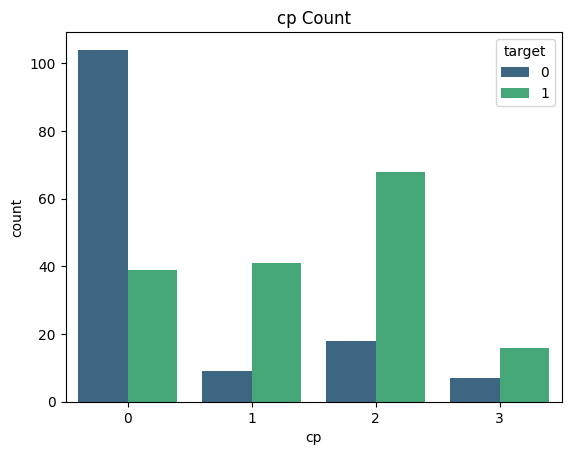

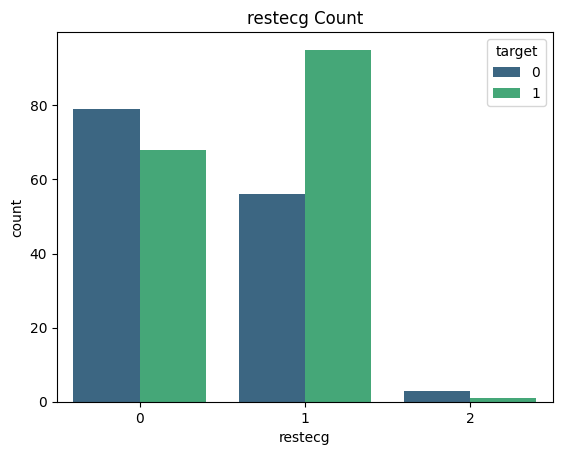

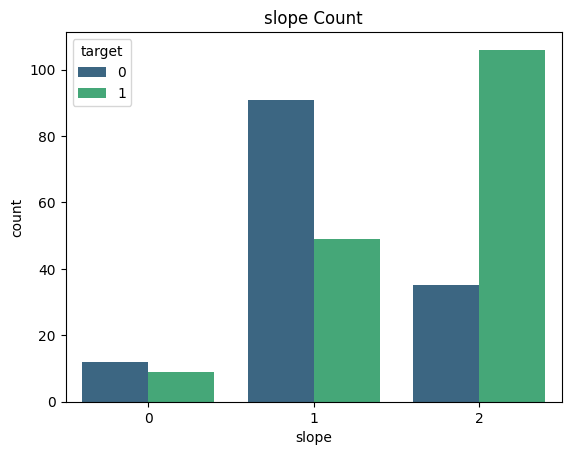

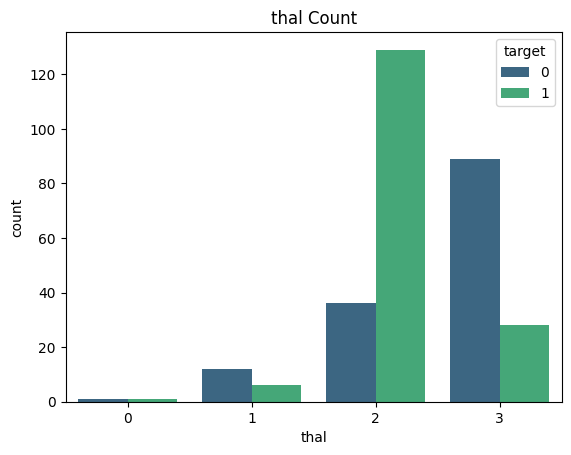

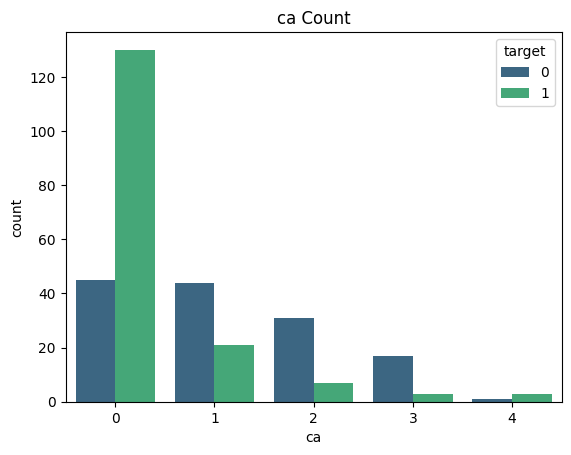

In [73]:
for col in categorical_features:
    plt.figure()
    sns.countplot(x=col, hue='target', data=heart, palette='viridis')
    plt.title(f'{col} Count')
    plt.show()

<Axes: >

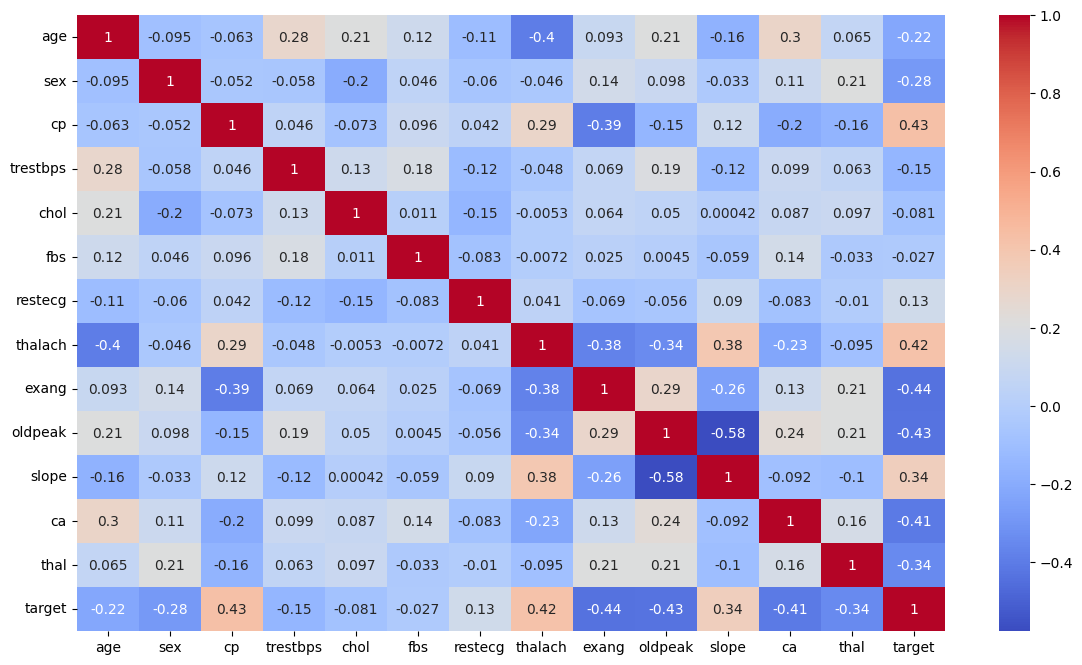

In [74]:
#Correlation Heatmap
plt.figure(figsize=(14,8))
sns.heatmap(heart.corr(), annot=True, cmap='coolwarm')

Correlation analysis reveals that chest pain type (cp), maximum heart rate achieved (thalach), ST segment slope (slope), exercise-induced angina (exang), ST depression (oldpeak), and number of major vessels (ca) show the strongest associations with heart disease diagnosis. While correlation signs are influenced by feature encoding, these variables consistently demonstrate meaningful relationships with the target and are supported by distributional analysis from countplots.

Chest pain type (cp) shows one of the strongest associations with heart disease diagnosis. Distributional analysis indicates that certain chest pain categories are significantly more prevalent among patients with heart disease, highlighting its diagnostic relevance. Although cp is a categorical variable encoded numerically, its consistent relationship with the target allows it to emerge as a strong predictive feature.

Exercise-induced angina (exang) shows one of the strongest associations with heart disease diagnosis. Patients experiencing angina during exertion are significantly more likely to be diagnosed with heart disease. The negative correlation reflects binary encoding rather than inverse clinical importance.

## 3. Modeling

Logistic Regression

In [75]:
# Features and target
X = heart.drop(columns='target')
y = heart['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7868852459016393
Confusion Matrix:
 [[19  9]
 [ 4 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.68      0.75        28
           1       0.76      0.88      0.82        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.78        61



Random Forest

In [76]:
# Features and target
X = heart.drop(columns='target')
y = heart['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Baseline Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7868852459016393
Confusion Matrix:
 [[18 10]
 [ 3 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.64      0.73        28
           1       0.75      0.91      0.82        33

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.80      0.79      0.78        61



Tune RF

In [77]:
# Features and target
X = heart.drop(columns='target')
y = heart['target']

# Train-test split (hold-out test set)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced'
)

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=cv,
    scoring='f1',
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_rf = grid.best_estimator_
print("Best params:", grid.best_params_)
print("Best CV F1:", grid.best_score_)

# Final test evaluation
y_pred = best_rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best params: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}
Best CV F1: 0.8689367924153
Test Accuracy: 0.819672131147541
Confusion Matrix:
 [[19  9]
 [ 2 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.68      0.78        28
           1       0.78      0.94      0.85        33

    accuracy                           0.82        61
   macro avg       0.84      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



In [78]:
importances = pd.Series(
    best_rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances

cp          0.203561
thal        0.139678
oldpeak     0.114591
thalach     0.104834
ca          0.103722
exang       0.083056
slope       0.060391
age         0.055506
chol        0.050979
trestbps    0.036807
sex         0.030215
restecg     0.014055
fbs         0.002604
dtype: float64

Base XGBoost

In [79]:
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3
)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7704918032786885
Confusion Matrix:
 [[19  9]
 [ 5 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.68      0.73        28
           1       0.76      0.85      0.80        33

    accuracy                           0.77        61
   macro avg       0.77      0.76      0.77        61
weighted avg       0.77      0.77      0.77        61



In [80]:
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
scale_pos_weight = neg / pos

In [81]:
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1
)

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3]
}

grid = GridSearchCV(
    xgb,
    param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)
best_xgb = grid.best_estimator_

y_pred = best_xgb.predict(X_test)

print("Best params:", grid.best_params_)
print("Best CV F1:", grid.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best params: {'colsample_bytree': 0.8, 'gamma': 0.3, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.8}
Best CV F1: 0.8538430490447407
Test Accuracy: 0.819672131147541
Confusion Matrix:
 [[20  8]
 [ 3 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



[[18 10]
 [ 1 32]]
              precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.76      0.97      0.85        33

    accuracy                           0.82        61
   macro avg       0.85      0.81      0.81        61
weighted avg       0.85      0.82      0.81        61

ROC AUC: 0.8809523809523809


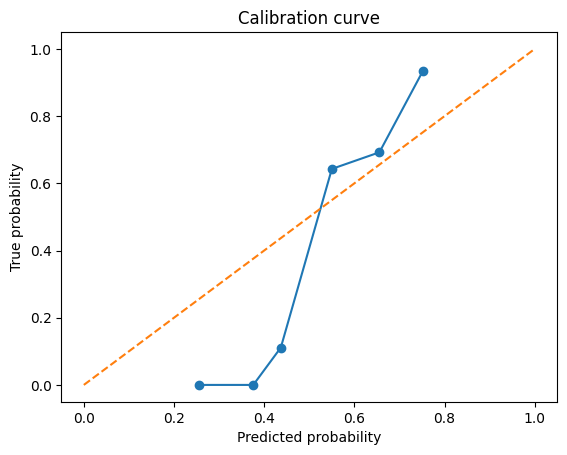

cp          0.286529
thal        0.189729
exang       0.127753
oldpeak     0.084469
ca          0.084070
slope       0.055211
sex         0.042649
thalach     0.037109
age         0.033527
chol        0.031352
trestbps    0.015170
restecg     0.012433
fbs         0.000000
dtype: float32


In [82]:
best_params_ = grid.best_params_
final_model = XGBClassifier(**best_params_)
final_model.fit(X_train, y_train)


y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)

plt.plot(prob_pred, prob_true, marker="o")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("Predicted probability")
plt.ylabel("True probability")
plt.title("Calibration curve")
plt.show()

calibrated_model = CalibratedClassifierCV(
    final_model,
    method="isotonic",   # sigmoid if small data
    cv=5
)
calibrated_model.fit(X_train, y_train)

importance = pd.Series(
    final_model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

print(importance.head(15))

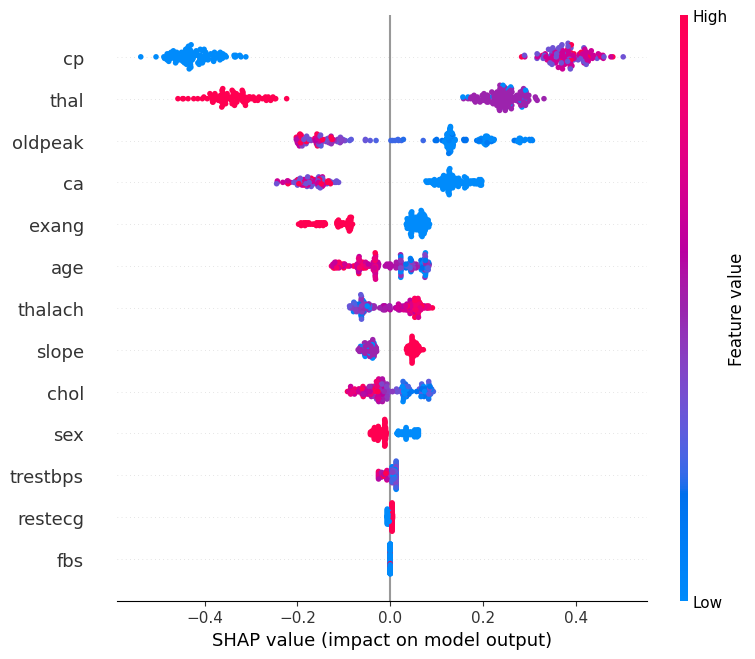

In [83]:
import shap
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)

In [84]:


# choose which model's probabilities you want to threshold
# y_proba = final_model.predict_proba(X_test)[:, 1]
y_proba = calibrated_model.predict_proba(X_test)[:, 1]  # recommended if you calibrated

def threshold_table(y_true, y_proba, thresholds=None):
    if thresholds is None:
        thresholds = np.linspace(0.05, 0.95, 19)  # 0.05, 0.10, ... 0.95

    rows = []
    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)
        rows.append({
            "threshold": float(t),
            "accuracy": accuracy_score(y_true, y_pred),
            "precision": precision_score(y_true, y_pred, zero_division=0),
            "recall": recall_score(y_true, y_pred, zero_division=0),
            "f1": f1_score(y_true, y_pred, zero_division=0),
        })
    return pd.DataFrame(rows).sort_values("threshold")

tbl = threshold_table(y_test, y_proba)
print(tbl)

# Option A: pick threshold that maximizes F1
best_t_f1 = tbl.loc[tbl["f1"].idxmax(), "threshold"]
print("Best threshold (max F1):", best_t_f1)

# Option B: pick threshold that maximizes Youden's J (recall + specificity - 1)
def youden_j(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    recall = tp / (tp + fn) if (tp + fn) else 0.0
    specificity = tn / (tn + fp) if (tn + fp) else 0.0
    return recall + specificity - 1

j_scores = []
for t in tbl["threshold"]:
    y_pred = (y_proba >= t).astype(int)
    j_scores.append(youden_j(y_test, y_pred))

tbl_j = tbl.copy()
tbl_j["youden_j"] = j_scores
best_t_j = tbl_j.loc[tbl_j["youden_j"].idxmax(), "threshold"]
print("Best threshold (max Youden J):", best_t_j)

# Evaluate at a chosen threshold (pick one)
chosen_t = float(best_t_f1)  # or best_t_j, or a manual value like 0.35
y_pred_thresh = (y_proba >= chosen_t).astype(int)

print("Chosen threshold:", chosen_t)
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_thresh))
print("Report:\n", classification_report(y_test, y_pred_thresh, zero_division=0))
print("ROC AUC (threshold-free):", roc_auc_score(y_test, y_proba))

    threshold  accuracy  precision    recall        f1
0        0.05  0.622951   0.589286  1.000000  0.741573
1        0.10  0.655738   0.611111  1.000000  0.758621
2        0.15  0.688525   0.634615  1.000000  0.776471
3        0.20  0.754098   0.687500  1.000000  0.814815
4        0.25  0.786885   0.717391  1.000000  0.835443
5        0.30  0.786885   0.727273  0.969697  0.831169
6        0.35  0.803279   0.744186  0.969697  0.842105
7        0.40  0.803279   0.744186  0.969697  0.842105
8        0.45  0.786885   0.738095  0.939394  0.826667
9        0.50  0.803279   0.756098  0.939394  0.837838
10       0.55  0.803279   0.783784  0.878788  0.828571
11       0.60  0.819672   0.823529  0.848485  0.835821
12       0.65  0.754098   0.821429  0.696970  0.754098
13       0.70  0.737705   0.840000  0.636364  0.724138
14       0.75  0.721311   0.833333  0.606061  0.701754
15       0.80  0.672131   0.809524  0.515152  0.629630
16       0.85  0.688525   0.850000  0.515152  0.641509
17       0

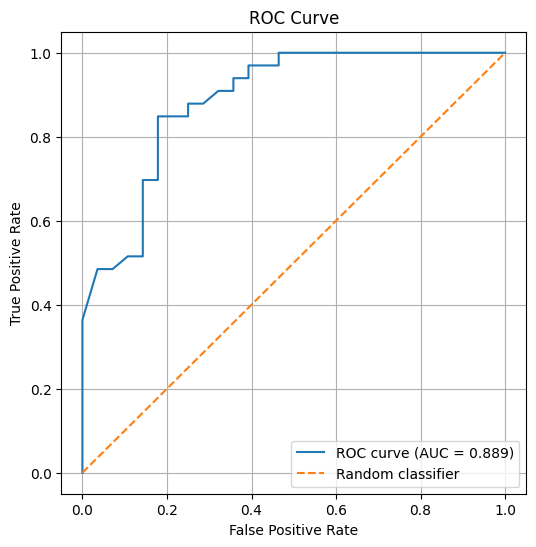

In [85]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute AUC
auc = roc_auc_score(y_test, y_proba)

# Plot
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

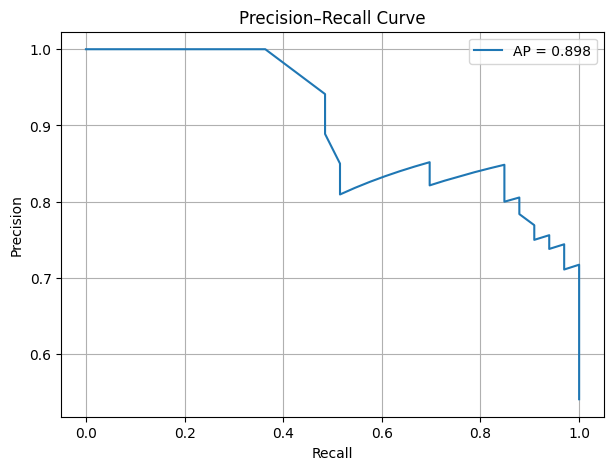

In [86]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)

plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label=f"AP = {avg_precision:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()
plt.grid(True)
plt.show()